In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
# 1) Importez votre ensemble de données et effectuez une analyse et une visualisation initiales
# Charger le fichier CSV
data = pd.read_csv('bank.csv')

# Afficher les premières lignes de l'ensemble de données
print(data.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [27]:
# Informations sur l'ensemble de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [29]:
# Statistiques descriptives
print(data.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


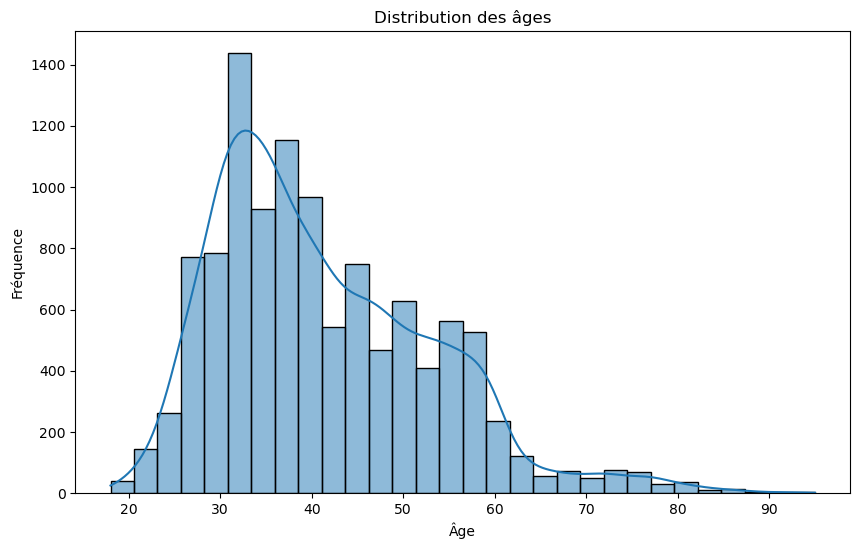

In [31]:
# Visualisation de la distribution des âges
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

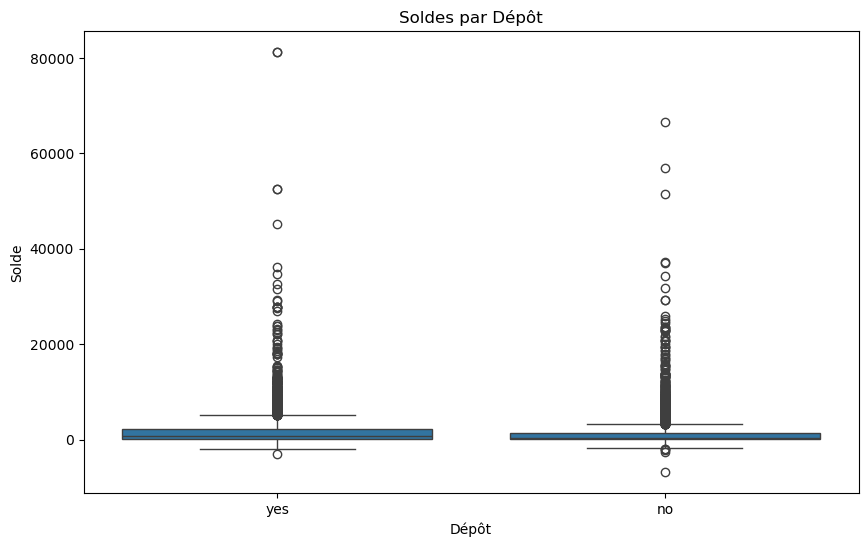

In [33]:
# Visualisation des soldes
plt.figure(figsize=(10, 6))
sns.boxplot(x='deposit', y='balance', data=data)
plt.title('Soldes par Dépôt')
plt.xlabel('Dépôt')
plt.ylabel('Solde')
plt.show()

In [35]:
# 2) Nettoyer les données

In [37]:
#Vérifier les valeurs manquantes
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [39]:
# Vérifier s'il y a des doublons 
data.duplicated().sum()

0

In [77]:
# valeurs aberrantes

# Calculer la moyenne et l'écart interquartile (IQR)
mean_balance = data['balance'].mean()
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

In [79]:
# Définir les limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [81]:
# Remplacer les valeurs aberrantes par la moyenne
data.loc[data['balance'] < lower_bound, 'balance'] = mean_balance.astype(int)
data.loc[data['balance'] > upper_bound, 'balance'] = mean_balance.astype(int)

In [85]:
# Calculer le Z-score
z_scores = stats.zscore(data['balance'])
outliers_z = data[(z_scores > 3) | (z_scores < -3)]
print("Valeurs aberrantes détectées avec Z-score :")
print(outliers_z)

Valeurs aberrantes détectées avec Z-score :
       age            job   marital  education default  balance housing loan  \
323     41    blue-collar  divorced  secondary      no     3622      no   no   
850     57        retired   married    primary      no     3518     yes   no   
902     50     management    single   tertiary      no     3537      no   no   
916     35    blue-collar    single  secondary      no     3623      no   no   
941     57    blue-collar   married    unknown      no     3585      no   no   
...    ...            ...       ...        ...     ...      ...     ...  ...   
10636   47    blue-collar   married  secondary      no     3630     yes   no   
10694   36     technician   married  secondary      no     3579      no   no   
10812   36  self-employed    single   tertiary      no     3560      no   no   
10814   56     technician    single  secondary      no     3499     yes   no   
10981   32         admin.   married  secondary      no     3540     yes   no

In [83]:
# Vérifier les modifications
print(data['balance'].describe())

count    11162.000000
mean       827.156961
std        889.766085
min      -1965.000000
25%        123.000000
50%        551.500000
75%       1528.000000
max       3634.000000
Name: balance, dtype: float64


In [55]:
# 3) Construisez un réseau d'apprentissage profond pour prédire le résultat de la campagne marketing (« dépôt » soit Oui, soit Non)

In [57]:
# Encoder la variable cible
le = LabelEncoder()
data['deposit'] = le.fit_transform(data['deposit'])

In [59]:
#Sélectionner les caractéristiques et la cible
X = data.drop('deposit', axis=1)
y = data['deposit']

In [61]:
#Convertir les colonnes catégorielles en variables numériques
X = pd.get_dummies(X)

In [63]:
# Normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [65]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
#Construction du modèle
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [69]:
# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
#Entraînement du modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6838 - loss: 0.5815 - val_accuracy: 0.8197 - val_loss: 0.4144
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8358 - loss: 0.3869 - val_accuracy: 0.8331 - val_loss: 0.3870
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8524 - loss: 0.3472 - val_accuracy: 0.8455 - val_loss: 0.3778
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8569 - loss: 0.3363 - val_accuracy: 0.8466 - val_loss: 0.3792
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.3239 - val_accuracy: 0.8427 - val_loss: 0.3765
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8681 - loss: 0.3134 - val_accuracy: 0.8399 - val_loss: 0.3874
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8743 - loss: 0.3060 - val_accuracy: 0.8505 - val_loss: 0.3724
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8807 - loss: 0.2893 - val_accuracy: 0.

In [93]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7872 - loss: 0.7659
Accuracy: 0.8003


In [89]:
# Prédictions 
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)  # Convertir en classes 0 ou 1

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
